<a href="https://colab.research.google.com/github/SKYUTS/MachineLearning-AI-/blob/main/Regression_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

In [ ]:
# Create example data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]).reshape(-1, 1)
y = np.array([1, 1.2, 1.4, 1.1, 1, 5.5, 6.1, 6.7, 6.4, 6, 6.1, 3.1, 3.2, 2.9, 3])

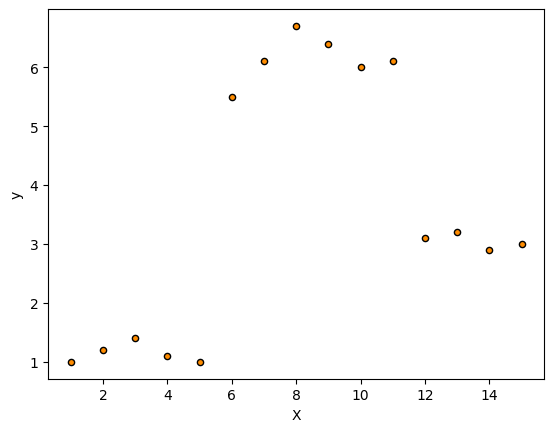

In [ ]:
# Plot the data
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Choose a split (a feature and a threshold) that results in overall minimum residual

In [ ]:
def calculate_split_residuals(X, y, threshold):
    # Split the data based on the threshold
    y_left = y[X.ravel() <= threshold]
    y_right = y[X.ravel() > threshold]

    # Calculate the mean of each group
    y_left_mean = y_left.mean()
    y_right_mean = y_right.mean()

    residuals_left = np.sum((y_left - y_left_mean) ** 2)
    residuals_right = np.sum((y_right - y_right_mean) ** 2)
    overall_residuals = residuals_left + residuals_right
    print(f'Threshold: {threshold}, Overall Residuals: {overall_residuals}')
    # Return the total sum of squared residuals
    return overall_residuals

Threshold: 1.5, Overall Residuals: 63.412142857142854
Threshold: 2.5, Overall Residuals: 55.95076923076923
Threshold: 3.5, Overall Residuals: 48.469166666666666
Threshold: 4.5, Overall Residuals: 37.594772727272726
Threshold: 5.5, Overall Residuals: 23.791999999999998
Threshold: 6.5, Overall Residuals: 39.233333333333334
Threshold: 7.5, Overall Residuals: 52.78928571428571
Threshold: 8.5, Overall Residuals: 63.748571428571424
Threshold: 9.5, Overall Residuals: 69.29055555555556
Threshold: 10.5, Overall Residuals: 70.916
Threshold: 11.5, Overall Residuals: 68.97545454545454
Threshold: 12.5, Overall Residuals: 69.50666666666666
Threshold: 13.5, Overall Residuals: 69.7973076923077
Threshold: 14.5, Overall Residuals: 70.46928571428572


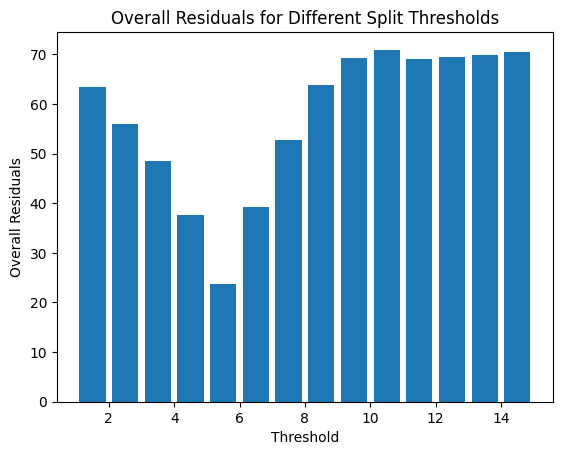

In [ ]:
thresholds = np.arange(1.5, 15, 1)
residuals = [calculate_split_residuals(X, y, threshold) for threshold in thresholds]

plt.bar(thresholds, residuals)
plt.xlabel('Threshold')
plt.ylabel('Overall Residuals')
plt.title('Overall Residuals for Different Split Thresholds')
plt.show()

In [ ]:
def calculate_y_means(X, y, threshold):
    # Split the data based on the threshold
    y_left = y[X.ravel() <= threshold]
    y_right = y[X.ravel() > threshold]

    # Calculate the mean of each group
    y_left_mean = y_left.mean()
    y_right_mean = y_right.mean()

    # Return the mean values
    return y_left_mean, y_right_mean

In [ ]:
y_left_mean_15, y_right_mean_15 = calculate_y_means(X, y, 1.5)
y_left_mean_55, y_right_mean_55 = calculate_y_means(X, y, 5.5)

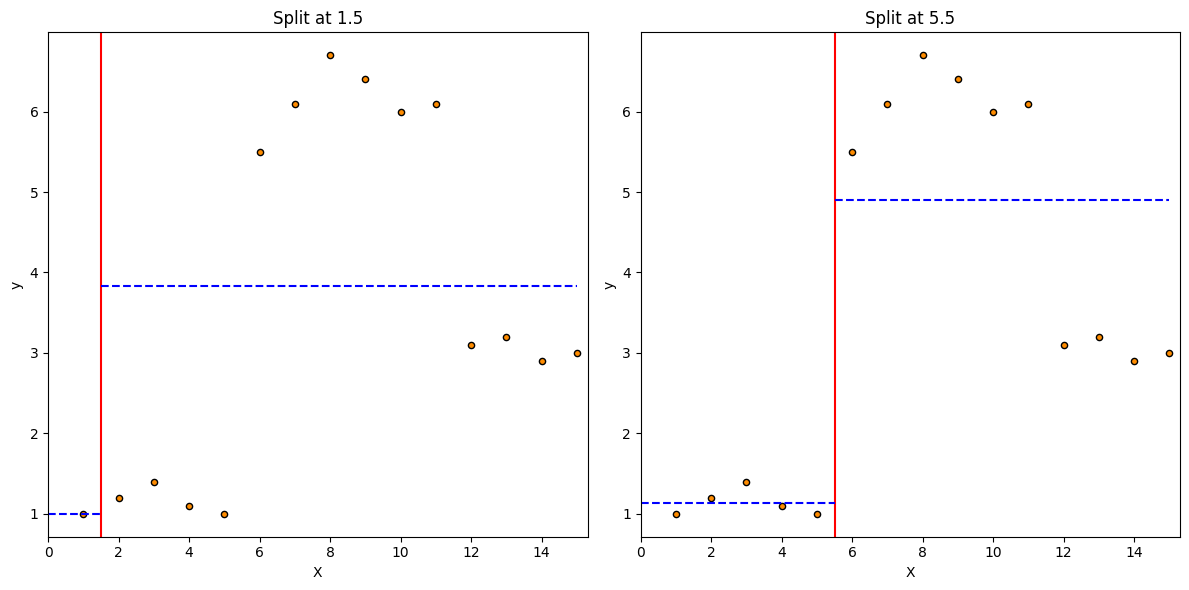

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for split at 1.5
axs[0].scatter(X, y, s=20, edgecolor="black", c="darkorange")
axs[0].axvline(x=1.5, color='r', linestyle='-')
axs[0].plot([0, 1.5], [y_left_mean_15, y_left_mean_15], color='blue', linestyle='--')
axs[0].plot([1.5, X.max()], [y_right_mean_15, y_right_mean_15], color='blue', linestyle='--')
axs[0].set_xlabel("X")
axs[0].set_ylabel("y")
axs[0].set_title("Split at 1.5")
axs[0].set_xlim([0, X.max() + 0.3])

# Plot for split at 5.5
axs[1].scatter(X, y, s=20, edgecolor="black", c="darkorange")
axs[1].axvline(x=5.5, color='r', linestyle='-')
axs[1].plot([0, 5.5], [y_left_mean_55, y_left_mean_55], color='blue', linestyle='--')
axs[1].plot([5.5, X.max()], [y_right_mean_55, y_right_mean_55], color='blue', linestyle='--')
axs[1].set_xlabel("X")
axs[1].set_ylabel("y")
axs[1].set_title("Split at 5.5")
axs[1].set_xlim([0, X.max() + 0.3])

# Display plots
plt.tight_layout()
plt.show()

## Using Built-in Regression Tree

In [ ]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

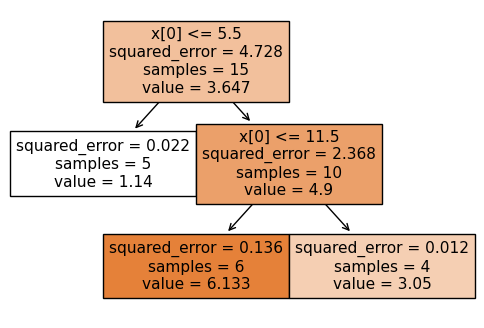

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
plot_tree(regr, filled=True, label="all", ax=ax)
plt.show()

In [ ]:
def squared_err(y_true, y_mean):
  n = len(y_true)
  return np.mean((y_true - y_mean)**2)

In [ ]:
mean_y = np.mean(y)
mean_y

3.646666666666667

In [ ]:
squared_err(y, mean_y)

4.727822222222222

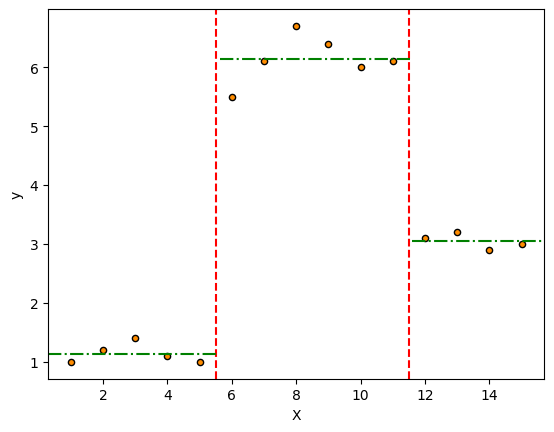

In [ ]:
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange")
plt.xlabel("X")
plt.ylabel("y")
plt.axvline(x=5.5, color='r', linestyle='--')
plt.axvline(x=11.5, color='r', linestyle='--')
plt.axhline(y=1.14, xmin=0, xmax=5.1/15, color='g', linestyle='-.')
plt.axhline(y=6.133, xmin=5.2/15, xmax=11/15, color='g', linestyle='-.')
plt.axhline(y=3.05, xmin=11/15, xmax=1, color='g', linestyle='-.')

plt.show()

## Predict

In [ ]:
# Ex: Predict the value of y when x = 9.5